# Employee Salary Analysis

Salary dataset encompasses details such as job title, complete job description, the name of the company or employer, and location. This is interconnected with data concerning earnings, including payroll frequency, average salary figures, and the count of employees at each salary tier. The data was obtained from kaggle.com

### Import LIbraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check the Data

In [3]:
salary = pd.read_csv('Salaries.csv')

In [4]:
salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [12]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [9]:
salary.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


### Drop Unnecessary columns

In [114]:
salary.drop('Notes',axis = 1, inplace = True)

In [115]:
salary.drop('Status',axis = 1, inplace = True)

Notes and status columns has been dropped because it is non-null

### Occurrence of Employee Name

In [20]:
salary['EmployeeName'].value_counts()

Kevin Lee                   13
Richard Lee                 11
Steven Lee                  11
William Wong                11
Stanley Lee                  9
                            ..
Jeffrey Skover               1
Ken Dever                    1
Kevin Whitfield              1
Granville McCollough III     1
Joe Lopez                    1
Name: EmployeeName, Length: 110811, dtype: int64

### Number of unique job titles

In [33]:
Unique_Job = salary['JobTitle'].nunique()
print('unique job title  =', Unique_Job)

unique job title  = 2159


### Total number of job titles that contain "captain"

In [36]:
captain_count = salary[salary['JobTitle'].str.contains('captain', case=False)]['JobTitle'].count()

print(f"Total number of job titles containing 'captain': {captain_count}")

Total number of job titles containing 'captain': 552


### Employee names from the fire department:

In [62]:
salary['Department'] = salary['JobTitle'].str.extract(r'\((.*?)\)')
fire_department_employees = salary[salary['Department'] == 'FIRE DEPARTMENT']['EmployeeName'].tolist()
print(f"Employee names from the fire department:\n{fire_department_employees}")

Employee names from the fire department:
['PATRICK GARDNER', 'ALSON LEE', 'MICHAEL MORRIS', 'JOANNE HAYES-WHITE', 'ARTHUR KENNEY', 'DAVID FRANKLIN', 'MARTY ROSS', 'VICTOR WYRSCH', 'RAYMOND GUZMAN', 'MONICA FIELDS', 'JOSE VELO', 'BRENDAN WARD', 'MICHAEL THOMPSON', 'THOMAS ABBOTT', 'THOMAS SIRAGUSA', 'BRYAN RUBENSTEIN', 'KIRK RICHARDSON', 'CHARLES CRANE', 'ROBERT POSTEL', 'RICHARD BUSALACCHI', 'KEVIN BURKE', 'EDUARDO GONZALEZ', 'LORRIE KALOS', 'MICHAEL BRYANT', 'MARK GONZALES', 'REX HALE', 'KEVIN SMITH', 'KEVIN TAYLOR', 'SAMSON LAI', 'KHAIRUL ALI', 'JOHN HICKEY', 'ZACHARY PUMPHREY', 'MICHAEL KEARNEY', 'MATTHEW MCNAUGHTON', 'DENNIS SUTTER', 'ROBERT SERRANO', 'JAMES VANNUCCHI', 'JAMES BLAKE', 'RUDY CASTELLANOS', 'MARK JOHNSON', 'RAEMONA WILLIAMS', 'DENISE NEWMAN', 'JOHN CREMEN', 'FRANK KOSTA', 'VINCENT NOLAN', 'CHERISH MURDOCK', 'RONALD LEWIN', 'GERALD SCULLION', 'ANTHONY SMERDEL', 'AUDRY LEE', 'AARON STEVENSON', 'JAMES BARDEN']


### minimum, maximum and average basepay

In [70]:
minimum_basepay = salary['BasePay'].min()
maxmum_basepay = salary['BasePay'].max()
average_basepay = salary['BasePay'].mean()`
print('minimum basepay =', minimum_basepay)
print('maxmum basepay =', maxmum_basepay)
print('average basepay =',average_basepay)

minimum basepay = -166.01
maxmum basepay = 319275.01
average basepay = 66325.44884050643


### Replace "Not provided" in employeename column with NAN

In [111]:
salary['EmployeeName'].replace("Not provided", np.nan, inplace=True)

Employee name with 'Not provided' has been replaced with nan

### Drop rows having 5 missing values

In [112]:
salary.dropna(thresh=7, inplace=True)

###  Job title of ALBERT PARDINI

In [96]:
albert_job_title = salary[salary['EmployeeName'] == 'ALBERT PARDINI']['JobTitle'].values[0]
print('Job title for ALBERT PARDINI is ', albert_job_title)

Job title for ALBERT PARDINI is  CAPTAIN III (POLICE DEPARTMENT)


### How much ALBERT PARDINI makes including benefits

In [ ]:
albert_total_pay_benefits = salary[salary['EmployeeName'] == 'ALBERT PARDINI']['TotalPayBenefits'].values[0]
albert_total_pay_benefits

335279.91

ALBERT PARDIN makes 335279.91 total pay with benefits

### The name of the person with the highest basepay

In [103]:
highest_basepay_person = salary.loc[salary['BasePay'].idxmax()]['EmployeeName']
print(highest_basepay_person ,'has the highest pay')

Gregory P Suhr has the highest pay


### The average basepay of all employees per job title

In [86]:
average_basepay_per_job = salary.groupby('JobTitle')['BasePay'].mean()
average_basepay_per_job 

JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2158, dtype: float64

### The average basepay of all employees having job title Accountant

In [105]:
average_basepay_accountant = salary[salary['JobTitle'] == 'ACCOUNTANT']['BasePay'].mean()
average_basepay_accountant

46643.172

### Five most common jobs

In [104]:
most_common_jobs = salary['JobTitle'].value_counts().head(5).index.tolist()
print('This are the five most common jobs', most_common_jobs)

This are the five most common jobs ['Transit Operator', 'Special Nurse', 'Registered Nurse', 'Public Svc Aide-Public Works', 'Police Officer 3']


Text(0, 0.5, 'Job count')

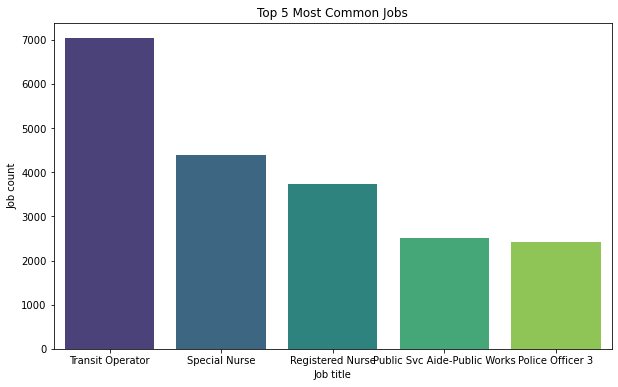

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x=salary['JobTitle'].value_counts().head().index, y=salary['JobTitle'].value_counts().head(), palette='viridis')
plt.title('Top 5 Most Common Jobs')
plt.xlabel('Job title')
plt.ylabel('Job count')

### Replace empty rows in benefit with zero

In [109]:
salary['Benefits'].fillna(0, inplace=True)

Empty rows in Benefits columns has been replaced with 0

In [137]:
salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco
